# Decision Trees and Random Forests: Predicting Bike Rentals in Washington DC

In this project, we'll predict the number of bikes rented in a given hour and day in Washington DC by creating a few different machine learning models. We'll evaluate and compare their performance.

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

bike_rentals = pd.read_csv('bike_rental_hour.csv')

bike_rentals.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

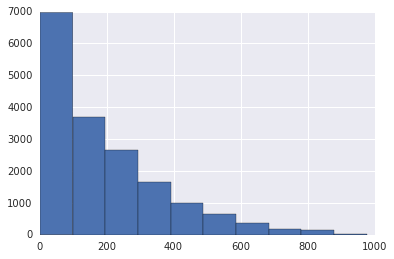

In [32]:
plt.hist(bike_rentals['cnt'])

In [33]:
bike_rentals.corr()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,1.000000,0.404046,0.866014,0.489164,-0.004775,0.014723,0.001357,-0.003416,-0.014198,0.136178,0.137615,0.009577,-0.074505,0.158295,0.282046,0.278379
season,0.404046,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,0.866014,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.489164,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.004775,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,0.014723,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,0.001357,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,-0.003416,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014198,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.136178,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772


Most hours see fewer than 200 rentals in DC. Temperature and Hour seem fairly correlated with rentals ('cnt').

Let's further categorize hours into "morning", "afternoon", "evening", and "night."

In [34]:
def assign_label(value):
    if value >= 6 and value <12:
        return 1
    elif value >= 12 and value <18:
        return 2
    elif value >= 18 and value <24:
        return 3
    elif value >=0 and value < 6:
        return 4
    
bike_rentals['time_label'] = bike_rentals['hr'].apply(assign_label)

bike_rentals.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,3
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,3
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,3
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,3
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49,3


We'll use mean squared error (MSE) as our error metric of choice to compare different machine learning algorithms. MSE works well on continuous numerical data, and penalizes large errors more than mean average error (MAE). I think that's right because capacity planning dictates that supply way exceeding demand results in big fixed costs not being recouped (underutilization is a big no no in capital intensive projects) and demand way outstripping supply really pisses customers off (which makes repeat usage less likely over time as you train your customers to seek alternatives). So large errors are really painful.

Let's split our data into train (80% of data) and test (20% of data) sets.

In [35]:
train = bike_rentals.sample(frac=0.8)

test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

Let's start with a linear regression model.

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#Make a list of predictors. I'm going to focus on dates, time of week, hours, and adjusted temperature and exclude the other columns.
predictors = ['yr','mnth', 'hr', 'time_label', 'holiday', 'weekday', 'workingday', 'atemp', 'hum', 'windspeed']

reg = LinearRegression()

reg.fit(train[predictors], train['cnt'])

test_lr_predictions = reg.predict(test[predictors])

print(mean_squared_error(test['cnt'], test_lr_predictions))

18006.355227138454


There's a pretty large error here. It's possible the large outliers are causing the model to underperform big time here. Remember that MSE penalizes large errors heavily.

Let's try a Decition Tree.

In [60]:
from sklearn.tree import DecisionTreeRegressor

dtreg = DecisionTreeRegressor(min_samples_leaf=5, criterion = 'mse')

dtreg.fit(train[predictors], train['cnt'])
test_dt_predictions = dtreg.predict(test[predictors])

print(mean_squared_error(test['cnt'], test_dt_predictions))

3178.205593878803


Ok we've achieved a much lower MSE from our Decision Tree than from our Linear Regression. We get big gains by adjusting the minimum samples required in a leaf (5 seems to be the lowest).

Let's try a Random Forest to see if we can further improve upon the simple Decision Tree.

In [75]:
from sklearn.ensemble import RandomForestRegressor

rfreg = RandomForestRegressor(min_samples_leaf=5, criterion = 'mse')

rfreg.fit(train[predictors], train['cnt'])
test_rf_predictions = rfreg.predict(test[predictors])

print(mean_squared_error(test['cnt'], test_rf_predictions))

2591.638093098261


A random forest outperforms a simple Decision Tree on accuracy. I can get better accuracy by lowering the minimum number of samples in each leaf, but I worry that will come at the expense of overfitting the model for future predictions.